In [151]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [152]:
df1 =pd.read_excel('WTP.xlsx', sheet_name='2019',header=1)
df2 =pd.read_excel('WTP.xlsx', sheet_name='2020',header=1)
df3 =pd.read_excel('WTP.xlsx', sheet_name='2021',header=1)
df4 = pd.read_excel('WTP.xlsx', sheet_name='2022',header=1)
df5 =pd.read_excel('WTP.xlsx', sheet_name='2023',header=1)

In [153]:
pH = df1.iloc[1:368, 8:9]

In [154]:
pH

,Unnamed: 8
1,0
2,7.16
3,7.19
4,6.71
5,6.45
...,...
363,0
364,7.01
365,7.04
366,NaN


In [155]:
pH = pd.concat([df1.iloc[1:368, 8:9], df2.iloc[1:368, 8:9], df3.iloc[1:368, 8:9], df4.iloc[1:368, 8:9], df5.iloc[1:368, 8:9]], axis=0)

In [156]:
pH

,Unnamed: 8
1,0
2,7.16
3,7.19
4,6.71
5,6.45
...,...
363,NaN
364,NaN
365,NaN
366,NaN


In [157]:
pH = pd.to_numeric(pH['Unnamed: 8'], errors='coerce').dropna()

In [158]:
pH

1     0.00
2     7.16
3     7.19
4     6.71
5     6.45
      ... 
35    7.03
36    0.00
37    7.54
38    7.66
39    6.82
Name: Unnamed: 8, Length: 1473, dtype: float64

In [159]:
pH = pd.DataFrame({'pH': pH})
pH.reset_index(drop=True,inplace = True)

In [160]:
chlorine = pd.concat([df1.iloc[1:368,12:13], df2.iloc[1:368,12:13], df3.iloc[1:368,12:13], df4.iloc[1:368,12:13], df5.iloc[1:368,12:13]], axis=0).reset_index(drop=True)
chlorine

,Unnamed: 12
0,0
1,2.04
2,2.04
3,2.02
4,2.15
...,...
1830,NaN
1831,NaN
1832,NaN
1833,NaN


In [161]:
chlorine = pd.to_numeric(chlorine['Unnamed: 12'], errors='coerce').dropna()

In [162]:
chlorine = pd.DataFrame({'chlorine': chlorine})

In [163]:
chlorine.reset_index(drop=True,inplace = True)

In [164]:
turbidity = pd.concat([df1.iloc[2:368,25:26], df2.iloc[1:368,25:26], df3.iloc[1:368,25:26], df4.iloc[1:368,25:26], df5.iloc[1:368,25:26]], axis=0)

In [165]:
turbidity

,Unnamed: 25
2,0.437
3,0.412
4,0.457
5,0.461
6,0
...,...
363,NaN
364,NaN
365,NaN
366,NaN


In [166]:
turbidity = pd.to_numeric(turbidity['Unnamed: 25'], errors='coerce').dropna()

In [167]:
turbidity = pd.DataFrame({'turbidity': turbidity})

In [168]:
turbidity.reset_index(drop=True,inplace = True)

In [169]:
X = pd.concat([turbidity, chlorine], axis=1)
y = pH

In [171]:
y

,pH
0,0.00
1,7.16
2,7.19
3,6.71
4,6.45
...,...
1468,7.03
1469,0.00
1470,7.54
1471,7.66


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [174]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.9075167916897122

In [175]:
import matplotlib.pyplot as plt

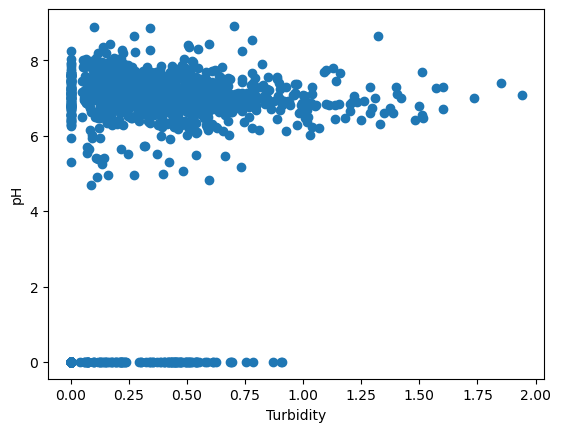

In [176]:
plt.scatter(turbidity, pH)
plt.xlabel('Turbidity')
plt.ylabel('pH')
plt.show()

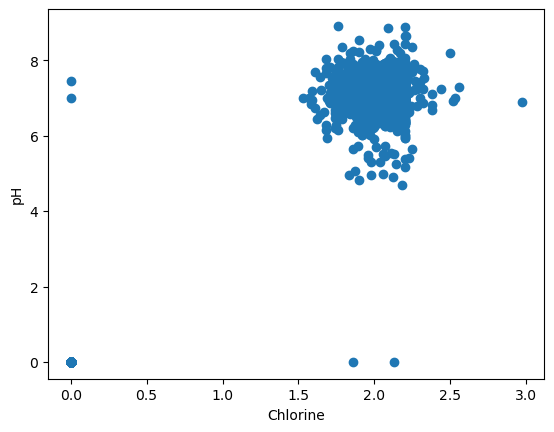

In [177]:
plt.scatter(chlorine, pH)
plt.xlabel('Chlorine')
plt.ylabel('pH')
plt.show()

In [178]:
turbidity_input = 0.703
chlorine_input = 1.91

In [179]:
input_df = pd.DataFrame({'turbidity': [turbidity_input], 'chlorine': [chlorine_input]})

In [180]:
pH_prediction = model.predict(input_df)

In [181]:
print("The predicted pH value is:", pH_prediction[0])

The predicted pH value is: 6.87
